We will predict the species of the flower based on the given datapoints

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
'''downloaded the iris dataset from https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv '''

#load the iris datset into pandas dataframe
iris = pd.read_csv("Irisdata.csv")
iris

FileNotFoundError: [Errno 2] File Irisdata.csv does not exist: 'Irisdata.csv'

In [34]:
print(iris.shape) 

print(iris.columns)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


150 rows & 5 columns

In [35]:
#to find the no of data points corresponding to each of the species
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# 2D Scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


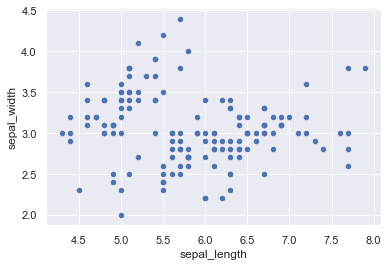

In [37]:
iris.plot(kind='scatter',x= 'sepal_length',y='sepal_width')
plt.show()

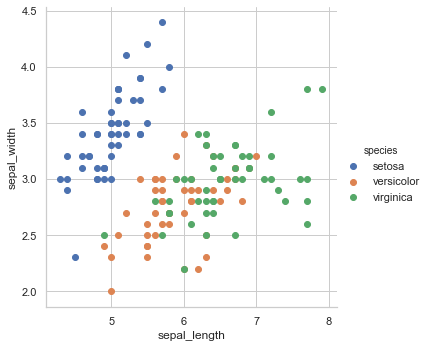

In [45]:
# 2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height = 5) \
   .map(plt.scatter,  "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

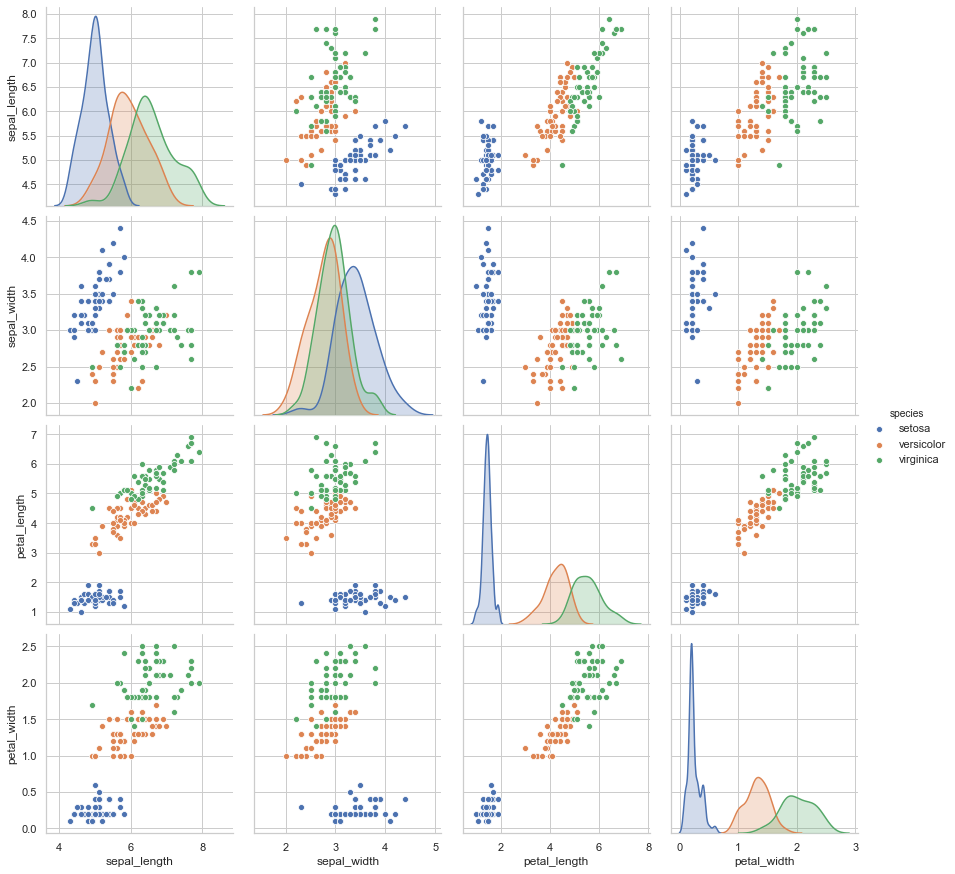

In [52]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()
pd.set_option('display.max_rows', 500)

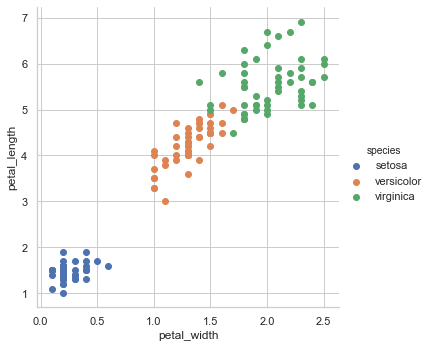

In [53]:
# 2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height = 5) \
   .map(plt.scatter,  "petal_width", "petal_length") \
   .add_legend();
plt.show();

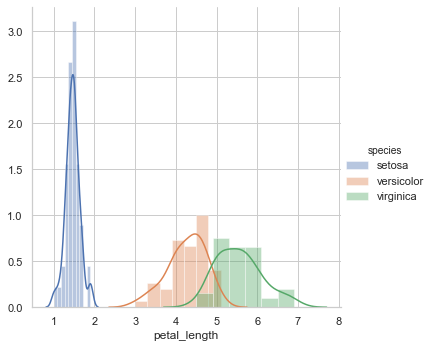

In [68]:
#plotting when we only have a single variable

sns.FacetGrid(iris,hue="species",height = 5)\
    .map(sns.distplot,"petal_length")\
    .add_legend()
plt.show();

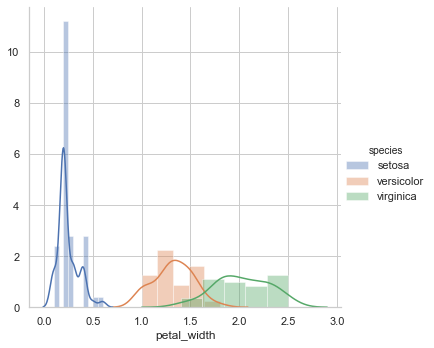

In [69]:
sns.FacetGrid(iris,hue="species",height = 5)\
    .map(sns.distplot,"petal_width")\
    .add_legend()
plt.show();


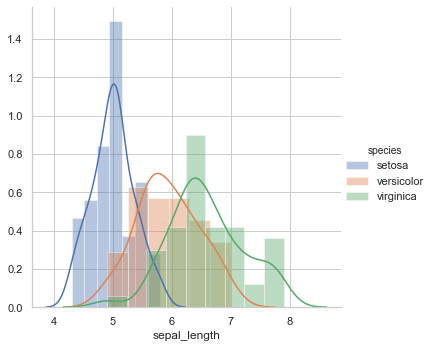

In [70]:
sns.FacetGrid(iris,hue="species",height = 5)\
    .map(sns.distplot,"sepal_length")\
    .add_legend()
plt.show();


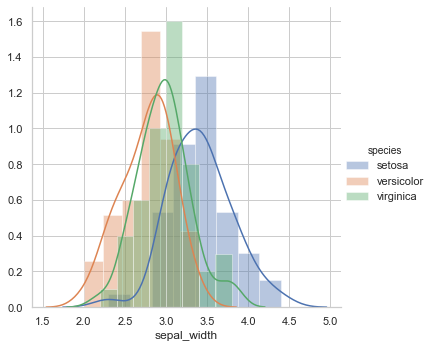

In [71]:
sns.FacetGrid(iris,hue="species",height = 5)\
    .map(sns.distplot,"sepal_width")\
    .add_legend()
plt.show();


In [1]:
# What about 1-D scatter plot using just one feature?
# the feature to use is determined by the above individual plots

# First we need separate data-frames for each label i.e the species.

iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

#we select only one feature-petal length-> print(iris_setosa["petal_length"])

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

NameError: name 'iris' is not defined

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


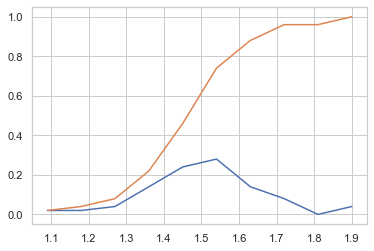

In [77]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


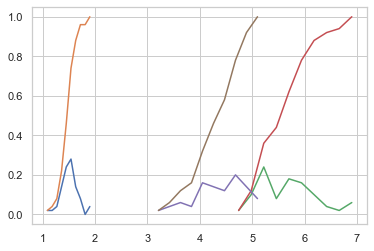

In [79]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [88]:
#Mean, Variance, Std-deviation,  
print("Means:")
print('mean setosa=',np.mean(iris_setosa["petal_length"]))


#Mean with an outlier,the value for 50 cms is an outlier.
print('mean outlier setosa=',np.mean(np.append(iris_setosa["petal_length"],500)));


print('mean virginica=',np.mean(iris_virginica["petal_length"]))
print('mean versicolor=',np.mean(iris_versicolor["petal_length"]))


print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
mean setosa= 1.464
mean outlier setosa= 11.23921568627451
mean virginica= 5.552
mean versicolor= 4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [92]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier / it shows no effect of erronous outliers on the median
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8


In [94]:
# The median absolute deviation

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


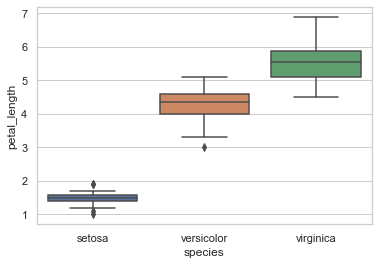

In [96]:
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

In [2]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

NameError: name 'sns' is not defined

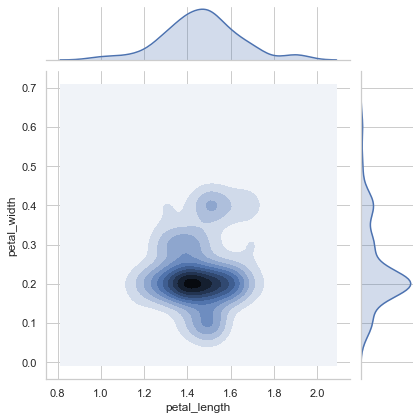

In [102]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();
#kde- contour density plots

In [1]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



NameError: name 'iris_virginica' is not defined